<a href="https://colab.research.google.com/github/Gimmi-07/FFML_Capstone/blob/main/Capstone_03_Recurrent_Neural_Network_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.Importing the Necessary Libraries

Firstly, we need to import the necessary libraries for the program. We are going to use the PyTorch library.

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt


##2. Creating a Sine Wave Dataset
For this example, we are going to create a simple sine wave dataset. We'll generate some dummy sequential data for training and testing the RNN.

In [10]:
class SineWaveDataset(Dataset):
    def __init__(self, data_size=1000, seq_len=10):
        self.data_size = data_size
        self.seq_len = seq_len
        self.data = []
        self.labels = []
        for _ in range(data_size):
            start = np.random.rand()
            x = np.linspace(start, start + 2*np.pi, seq_len)
            y = np.sin(x)
            self.data.append(y[:-1])
            self.labels.append(y[1:])
        self.data = torch.tensor(self.data, dtype=torch.float32).unsqueeze(-1)
        self.labels = torch.tensor(self.labels, dtype=torch.float32).unsqueeze(-1)

    def __len__(self):
        return self.data_size

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

train_dataset = SineWaveDataset(data_size=1000, seq_len=10)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = SineWaveDataset(data_size=200, seq_len=10)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


##3. Visualizing the Data
We will visualize some samples from the dataset to understand what the data looks like.

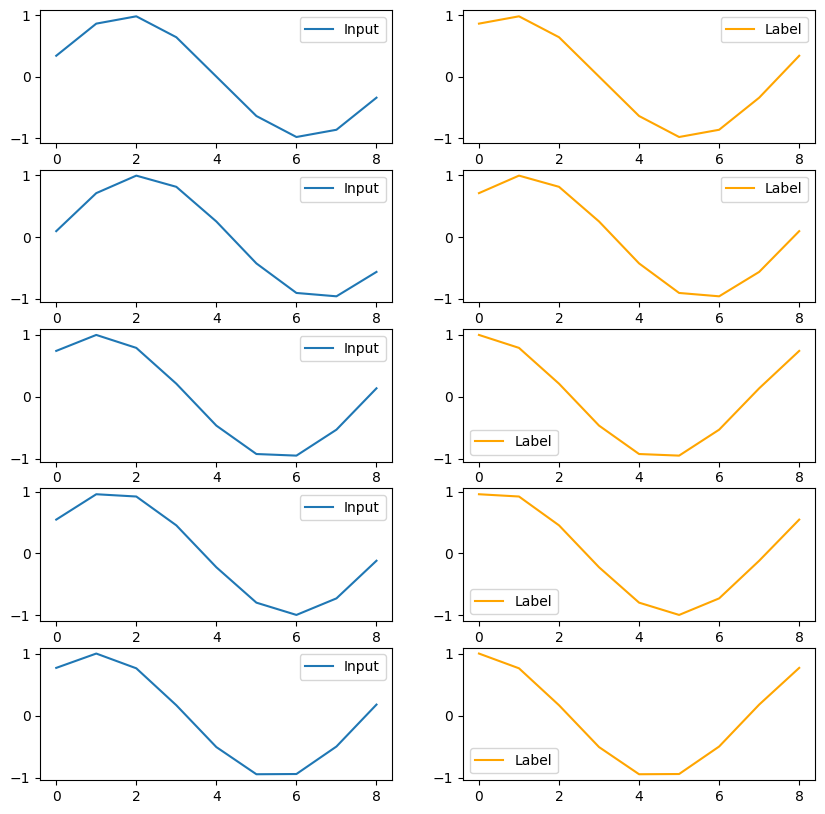

In [11]:
# Function to visualize some samples from the dataset
def visualize_samples(loader, num_samples=5):
    samples = []
    labels = []

    for data, label in loader:
        samples.append(data)
        labels.append(label)
        if len(samples) >= num_samples:
            break

    samples = torch.cat(samples, dim=0)[:num_samples]
    labels = torch.cat(labels, dim=0)[:num_samples]

    fig, axes = plt.subplots(num_samples, 2, figsize=(10, num_samples*2))
    for i in range(num_samples):
        axes[i, 0].plot(samples[i].numpy().squeeze(), label='Input')
        axes[i, 0].legend()
        axes[i, 1].plot(labels[i].numpy().squeeze(), label='Label', color='orange')
        axes[i, 1].legend()

    plt.show()

# Visualize some samples from the train loader
visualize_samples(train_loader, num_samples=5)


##4. Defining the RNN Model
We are going to define a simple RNN model for the sine wave dataset.

In [12]:
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out)
        return out

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
input_size = 1
hidden_size = 16
output_size = 1
num_layers = 1

net = SimpleRNN(input_size, hidden_size, output_size, num_layers).to(device)
print(net)


cpu
SimpleRNN(
  (rnn): RNN(1, 16, batch_first=True)
  (fc): Linear(in_features=16, out_features=1, bias=True)
)


##5. Defining the Loss Function and Optimizer
We specify the loss function and the optimizer for the model.

In [13]:
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
print(criterion)
print(optimizer)


MSELoss()
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


##6. Training the Model
We will train the model on the training data.

In [14]:
num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        # Move tensors to the correct device
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 10 == 9:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 10:.3f}')
            running_loss = 0.0

print('Finished Training')


Epoch 1, Batch 10, Loss: 0.530
Epoch 1, Batch 20, Loss: 0.483
Epoch 1, Batch 30, Loss: 0.436
Epoch 2, Batch 10, Loss: 0.374
Epoch 2, Batch 20, Loss: 0.310
Epoch 2, Batch 30, Loss: 0.235
Epoch 3, Batch 10, Loss: 0.132
Epoch 3, Batch 20, Loss: 0.063
Epoch 3, Batch 30, Loss: 0.034
Epoch 4, Batch 10, Loss: 0.028
Epoch 4, Batch 20, Loss: 0.022
Epoch 4, Batch 30, Loss: 0.017
Epoch 5, Batch 10, Loss: 0.015
Epoch 5, Batch 20, Loss: 0.013
Epoch 5, Batch 30, Loss: 0.012
Epoch 6, Batch 10, Loss: 0.012
Epoch 6, Batch 20, Loss: 0.010
Epoch 6, Batch 30, Loss: 0.010
Epoch 7, Batch 10, Loss: 0.010
Epoch 7, Batch 20, Loss: 0.009
Epoch 7, Batch 30, Loss: 0.008
Epoch 8, Batch 10, Loss: 0.008
Epoch 8, Batch 20, Loss: 0.007
Epoch 8, Batch 30, Loss: 0.007
Epoch 9, Batch 10, Loss: 0.006
Epoch 9, Batch 20, Loss: 0.006
Epoch 9, Batch 30, Loss: 0.005
Epoch 10, Batch 10, Loss: 0.005
Epoch 10, Batch 20, Loss: 0.005
Epoch 10, Batch 30, Loss: 0.004
Finished Training


##7. Evaluating the Model
We will evaluate the model on the test data.

In [15]:
total_loss = 0.0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        total_loss += loss.item()

print(f'Average loss on the test data: {total_loss / len(test_loader):.3f}')


Average loss on the test data: 0.005


#**Conclusion**
implementing an RNN with PyTorch involves importing libraries, creating a dataset, defining the model, setting up the loss and optimizer, training the model, and evaluating its performance.